In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names

In [92]:
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('BC_ABS_GOM21FA_ID2157_St.11/*.txt')
files

['BC_ABS_GOM21FA_ID2157_St.11/215745_Absorbance__0__12.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215741_Absorbance__2__02.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215748_Absorbance__1__22.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215752_Absorbance__2__35.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215748_Absorbance__0__21.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215754_Absorbance__2__41.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215745_Absorbance__1__13.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215743_Absorbance__1__07.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215745_Absorbance__2__14.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215748_Absorbance__2__23.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215741_Absorbance__1__01.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215752_Absorbance__1__34.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215752_Absorbance__0__33.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215754_Absorbance__1__40.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215741_Absorbance__0__00.txt',
 'BC_ABS_GOM21FA_ID2157_St.11/215744_Absorbance__0__09.txt',
 'BC_ABS_GOM21FA_ID2157_

0.12030534602614651


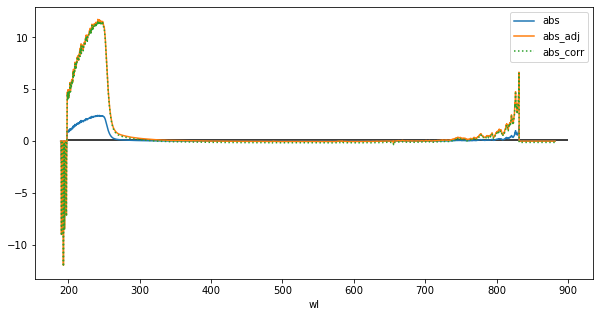

In [48]:
#THIS SHOWS WHAT THE DIFFERENT "CORRECTIONS DO TO THE ORIGINAL ABS"
df = pd.read_csv(files[0], skiprows=14, names=['wl', 'abs'], sep='\t')
df['abs_adj'] = df['abs']*(2.303/.488)
bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs_adj'].mean()
df['abs_corr'] = df['abs_adj']-bcorr


fig, ax = plt.subplots(figsize=(10,5))
df.plot(x='wl', y='abs', ax=ax)
df.plot(x='wl', y='abs_adj', ax=ax)
df.plot(x='wl', y='abs_corr', ax=ax, ls=':')
print(bcorr)

In [91]:
def open_file(name):
    # returns a datafame from a raw file
    # input: filename (string)
    # output: pandas dataframe 

    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    
    # unit conversion (?)
    df['abs'] = df['abs']*(2.303/.488)
    # baseline correction
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float
    df['abs'] = df['abs'] - bcorr
    return df

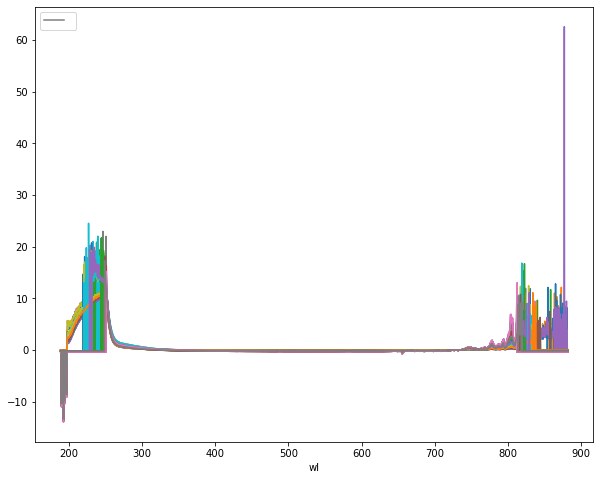

In [93]:
#Creates a figure, with size 10X8
fig, ax = plt.subplots(figsize=(10,8))

#creates an empty list
frames = []

#loops through the list of names
for f in files:
    #opens file with above function
    df = open_file(f)
    #plots with names in the dataframe df.plot(xname, yname)
    #label='', cleans the label, otherwishe there will be all called 'abs'
    #ax=ax, tell it to put the plot in the box called ax defined above in fig, ax =
    df.plot('wl', 'abs', label='', ax=ax) #f[28:34]
    # updates the list created above with the new dataframe
    frames.append(df)
#frames is a list of dataframes

#concatenates all dataframes in one single dataframe
full = pd.concat(frames, axis=0, ignore_index=True)

# ax.set_ylim(0,10)

<AxesSubplot:xlabel='wl'>

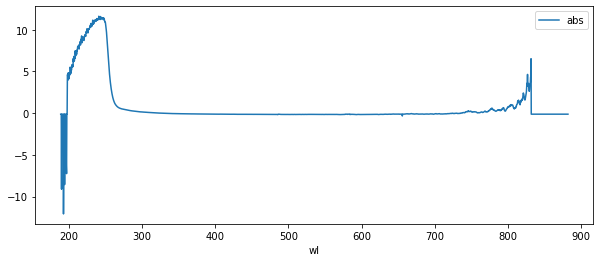

In [84]:
# this is a plot of a single file
fig, ax = plt.subplots(figsize=(10,4))
frames[0].plot('wl', 'abs', ax=ax)

In [88]:
slopes =  { 's1': (275, 295),
        's2': (300,400),
        's3': (275, 700)
       }

-0.016036854890484533
-0.0036121643764446126
-0.0008342958059125932


In [ ]:
# def monoExp(x, m, t, b):
#     return m * np.exp(-t * x) + b

def monoExp(slope, a_lr, dl, b):
    #dl = l - lr
    return a_lr * np.exp(-slope*dl) + b

# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")

